# Data description :

1-Age: age of the patient [years]
2-Sex: sex of the patient [M: Male, F: Female]
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP: resting blood pressure [mm Hg]
Cholesterol: serum cholesterol [mm/dl]
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Oldpeak: oldpeak = ST [Numeric value measured in depression]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]

hello
hi
hijmmmhgf vfddsssk hhh


kk

kk


# Importing libraries :

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [6]:
#df=pd.read_csv("../input/heart-failure-prediction/heart.csv")
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.shape

(918, 12)

# EDA:

In [8]:
df.isnull().sum()
#check if there is missing data and we found that there is no missing data 

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
df.info()
#we have three types in this data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

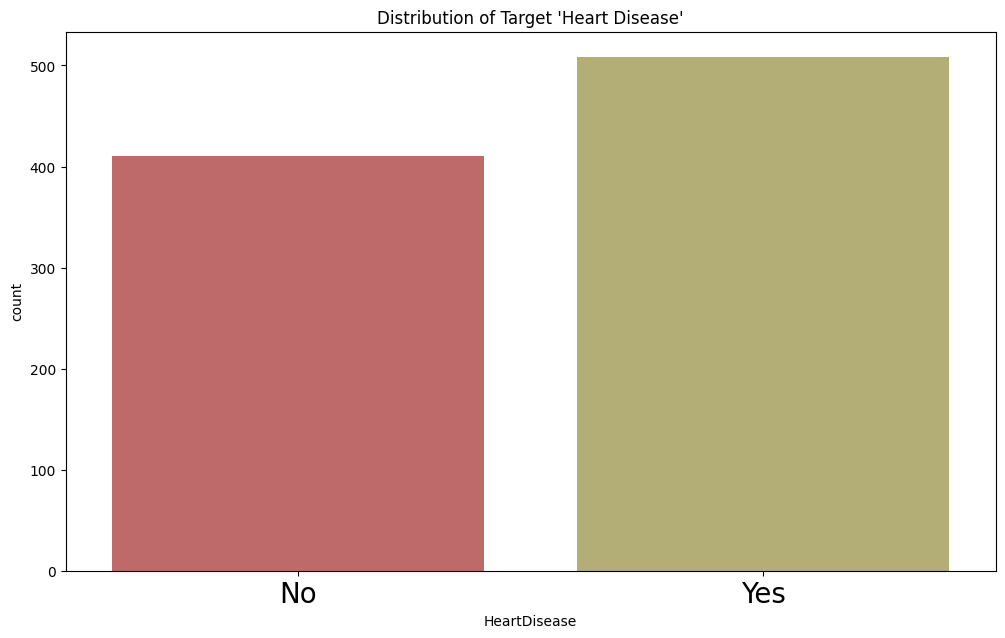

In [10]:
plt.figure(figsize=(12, 7))
heartDisease_countplot = sns.countplot(x=df.HeartDisease,palette=["#CD5C5C","#BDB76B"])
heartDisease_countplot.set_title("Distribution of Target 'Heart Disease'")
heartDisease_countplot.set_xticklabels(['No', 'Yes'], fontsize=20)
#OUR TARGET IS Heart Disease :

Here we notice that there is heartdisease is more than there is not 

Text(0, 0.5, 'Count')

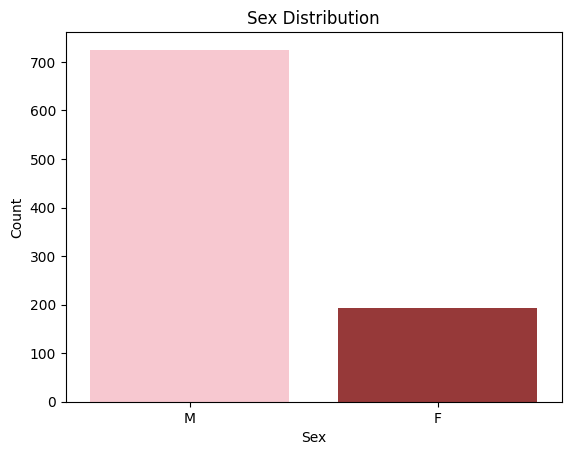

In [12]:
sns.countplot(data=df,x='Sex' , palette=['pink','brown']);
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')

Here we notice the who have more heart disease is the males 

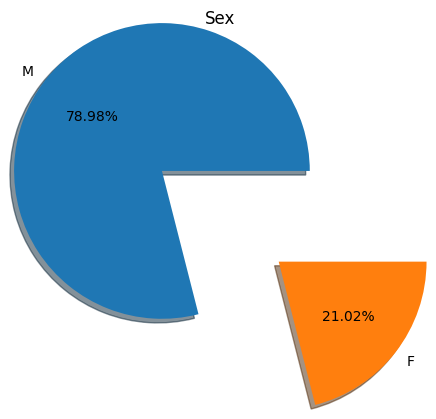

In [13]:
plt.rcParams.update({'font.size': 10})
ax=df['Sex'].value_counts().plot.pie(explode=[0.5,0.5],autopct='%1.2f%%',shadow=True );
ax.set_title(label = "Sex");
plt.axis('off');

Here we find 78.98% of makes have heart disease and 21.02% of females have heart disease and 
males are approximately 3 times more likely to have heart disease than females.

In [14]:
df.ChestPainType.unique() 

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

Here we check the types of chestpain :we have four types of chest pain 
    ATA,NAP,ASY,TA
   

In [15]:
ChestPainType_label = ['ATA', 'NAP', 'ASY', 'TA']
ChestPainType_size = [173, 203, 496, 46]
ChestPainType_explode = (0, 0, 0, 0)

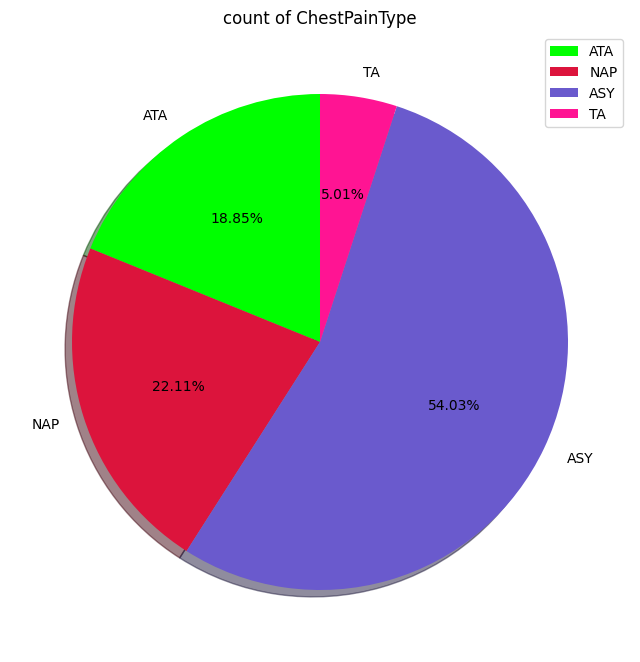

In [16]:
plt.figure(figsize=(8,9))
plt.pie( ChestPainType_size , explode=ChestPainType_explode , labels=ChestPainType_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors= ['lime','crimson', 'slateblue', 'deeppink'])
plt.title("count of ChestPainType")
plt.legend()

 Here we found that ASY is the type who has the highest pre for the pain chest .

Here first we have to know that  RestingECG is :a non-invasive test that can detect abnormalities including arrhythmias,evidence of coronary heart disease, left ventricular hypertrophy and bundle branch blocks. 

In [17]:
RestingECG_label = ['Normal', 'ST', 'LVH']
RestingECG_size = [552, 178, 188]
RestingECG_explode = (0, 0, 0)

here we have three levels of restingEGG':'Normal', 'ST', 'LVH'

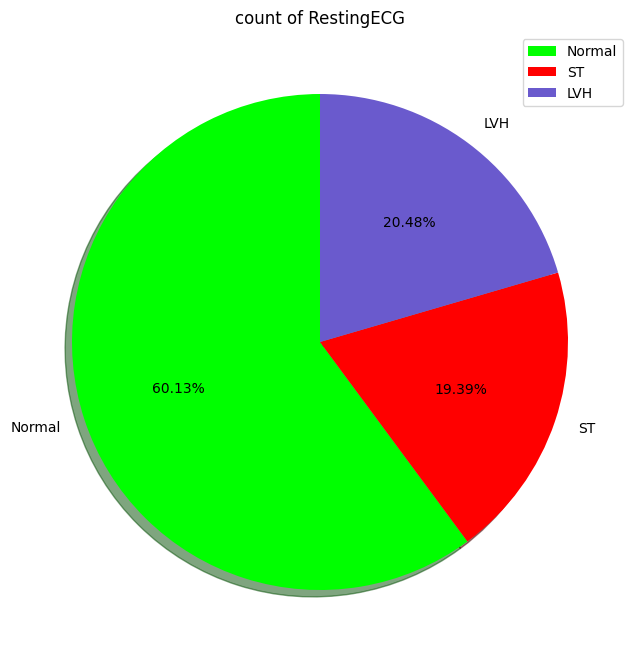

In [18]:
plt.figure(figsize=(8,9))
plt.pie( RestingECG_size , explode=RestingECG_explode , labels=RestingECG_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors=['lime', 'red', 'slateblue'])
plt.title("count of RestingECG")
plt.legend()

Here we find that the normal have the highest pre 

In [20]:
ExerciseAngina_label = ['yes', 'no']
ExerciseAngina_size = [552, 178]
ExerciseAngina_explode = (0, 0)

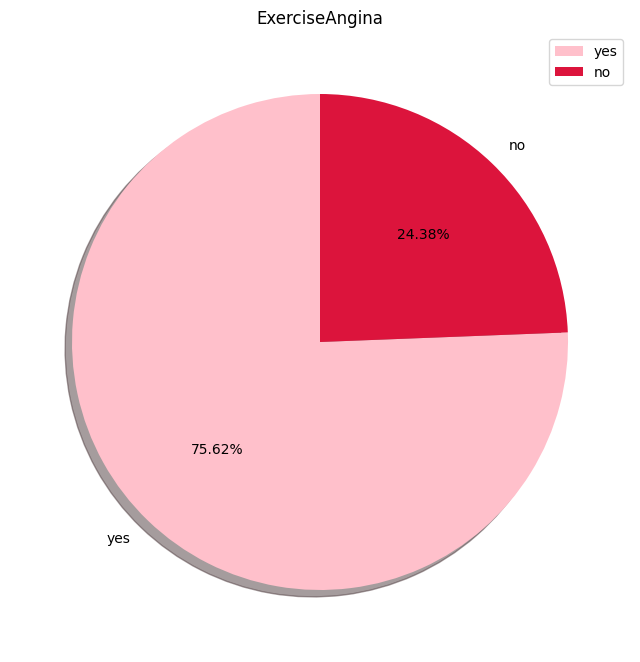

In [21]:
plt.figure(figsize=(8,9))
plt.pie( ExerciseAngina_size , explode=ExerciseAngina_explode , labels=ExerciseAngina_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors=['pink', 'crimson'])
plt.title("ExerciseAngina")
plt.legend()

Here who had ExerciseAngina is more than whos hadnot and by pre is 75.62%

In [22]:
ST_Slope_label = ['Flat','Up','Down']
ST_Slope_size = [552, 178, 188]
ST_Slope_explode = (0, 0, 0)

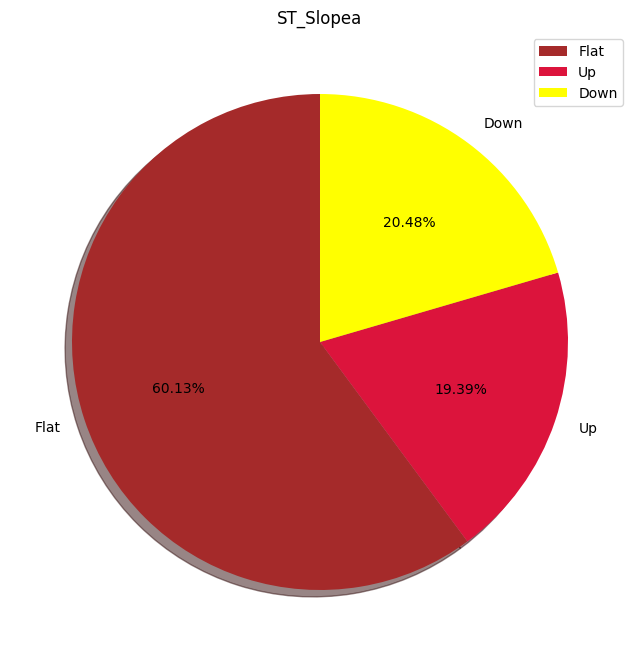

In [23]:
plt.figure(figsize=(8,9))
plt.pie( ST_Slope_size , explode=ST_Slope_explode , labels=ST_Slope_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors=['brown', 'crimson','yellow'])
plt.title("ST_Slopea")
plt.legend()

In [ ]:
Categorical = df.select_dtypes(include=['object'])
Numerical = df.select_dtypes(include=['int64', 'float64'])

In [ ]:
# ploting numerical features with target
#here we compare betwwen our target and our numerical features 
for i in Numerical:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i, data=df, hue='HeartDisease')
    plt.legend(['Normal', 'Heart Disease'])
    plt.title(i)
    plt.show()

In [ ]:
#here we compare betwwen our target and our Categorical features 
for i in Categorical:
    plt.figure(figsize=(10,10))
    sns.countplot(x=i, data=df, hue='HeartDisease', edgecolor='black')
    plt.legend(['Normal', 'Heart Disease'])
    plt.title(i)
    plt.show()

# Handeling with outliers :

In [ ]:
plt.figure(figsize=(15,9))
sns.boxplot(data=df)

after the boxplot we find that the outliers here in (age - restingBP-cholesterol-MaxHR-oldpeak)

so that i decided to make alist of them 

In [ ]:
df_num_name = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


In [ ]:
#here we are detecting outliers :

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [ ]:
#here we are trying to find the numbers of outliers and max and min of them to can detect them clearly:
outliers = find_outliers_IQR(df['RestingBP'])
print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

we find that there are 27 outliers and max ouliers id 200 and the min is 80 

In [ ]:
for char in df_num_name :
    outliers = find_outliers_IQR(df[str(char)])
    
    print(f"-Check {char} outliers ")

    print('number of outliers: '+ str(len(outliers)))

    print('max outlier value: '+ str(outliers.max()))

    print('min outlier value: '+ str(outliers.min())+ '\n')

In [ ]:
print(f" original shape of Cholesterol : {df.Cholesterol.shape}")

ziro_Cholesterol = df[df['Cholesterol'] == 0]
print(f" zero values of Cholesterol : {ziro_Cholesterol.shape}")

non_ziro_Cholesterol = df[df['Cholesterol'] != 0]
print(f" non zero values of Cholesterol : {non_ziro_Cholesterol.shape}")

In [ ]:
df.loc[df['Cholesterol'] == 0,'Cholesterol'] = np.nan
df.head(5)

In [ ]:
df["Cholesterol"] = df["Cholesterol"].fillna(df["Cholesterol"].median())
df["Cholesterol"]

In [ ]:
ziro_RestingBP = df[df['RestingBP'] == 0]
ziro_RestingBP

In [ ]:
df = df.drop(df[(df['RestingBP'] == 0)].index) 
#after this we decide to drop this columns 

In [ ]:
normal_RestingBP = df[df['RestingBP'] <= 120 ]
PreHyper_RestingBP = df[(df['RestingBP'] > 120) & (df['RestingBP']<= 139) ]
High1_RestingBP = df[(df['RestingBP'] >= 140) & (df['RestingBP']<= 159) ]
High2_RestingBP = df[(df['RestingBP'] >= 160) & (df['RestingBP']<= 180) ]
HyperTensive_RestingBP = df[df['RestingBP'] >= 180]
#here we detect the restingbp

# Encoding categorical features:

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
ChestPainType_le = LabelEncoder()
RestingECG_le = LabelEncoder()
ExerciseAngina_le = LabelEncoder()
ST_Slope_le = LabelEncoder()
Sex_le = LabelEncoder()


In [ ]:
df['ChestPainType'] = ChestPainType_le.fit_transform(df['ChestPainType'])

In [ ]:
ChestPainType_le.classes_

In [ ]:
df['RestingECG'] = RestingECG_le.fit_transform(df['RestingECG'])


In [ ]:
RestingECG_le.classes_

In [ ]:
df['ST_Slope'] = ST_Slope_le.fit_transform(df['ExerciseAngina'])

In [ ]:
ST_Slope_le.classes_

In [ ]:
df['ExerciseAngina'] = ExerciseAngina_le.fit_transform(df['ExerciseAngina'])

In [ ]:
ExerciseAngina_le.classes_

In [ ]:
df['Sex'] = Sex_le.fit_transform(df['Sex'])

In [ ]:
Sex_le.classes_

In [ ]:
df.info()

# Split and test the data:

In [ ]:
x = df.drop('HeartDisease', axis=1)
y = df.HeartDisease
#here we seprate the target 

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=21)

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(x)
X_train_std=std_scaler.transform(X_train)
X_test_std=std_scaler.transform(X_test)

X_train = pd.DataFrame(X_train_std, columns=x.columns)
X_test = pd.DataFrame(X_test_std, columns=x.columns)

In [ ]:
display(X_train.head())
display(X_test.head())

# Modeling by different methods  :

# Logistic Regression :


In [ ]:
lr = LogisticRegression(C = 80)

In [ ]:
lr.fit(X_train , y_train)

In [ ]:
lr.score(X_train , y_train)

In [ ]:
lr.score(X_test , y_test)

In [ ]:
lr.predict(X_test)

In [ ]:
Y_pred = lr.predict(X_test)
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(10)

# KNN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(X_train , y_train)

In [ ]:
knn.score(X_train , y_train)

In [ ]:
knn.score(X_test , y_test)

# Decision Tree:


In [ ]:
dt =DecisionTreeClassifier(max_features=9 ,    max_depth=4)

In [ ]:
dt.fit(X_train , y_train)

In [ ]:
dt.score(X_train , y_train)

In [ ]:
dt.score(X_test , y_test)


In [ ]:
from sklearn import tree
fig = plt.figure(figsize = (15,12))
tree.plot_tree(dt , filled= True)

In [ ]:
Y_pred = dt.predict(X_test)
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(10)

In [ ]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for dt')
    plt.show()

# whatever your features are called
features_names = list(df.columns)
    
#dt= DecisionTreeClassifier (max_depth=7, max_features=6)
#df.fit(x_train,y_train)

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(dt.feature_importances_), features_names, top=7)

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(dt.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt.score(X_test, y_test)))

In [ ]:
#Classification Report#:it seems it is very good 
from sklearn.metrics import classification_report

print(classification_report(y_test, Y_pred))

In [ ]:
#Here, the training-set accuracy score is0.8226 while the test-set accuracy to be 0.8207 
#These two values are quite comparable.
#So, there is no sign of overfitting

# Random Forest:

In [ ]:
rf = RandomForestClassifier(max_features=7 ,    max_depth=3)

In [ ]:
rf.fit(X_train , y_train)
rf.score(X_train , y_train)

In [ ]:
rf.score(X_test , y_test)

In [ ]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# whatever your features are called
features_names = list(df.columns)
    
rf =RandomForestClassifier(n_estimators=4 , max_depth=3 , min_samples_split=25 , max_features=4)
rf.fit(X_train,y_train)

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(rf.feature_importances_), features_names, top=8)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
Accuracy, Precision, Recall, F1= {}, {}, {}, {}
models = {}
models['Logistic Regression'] = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
models['K-Nearest Neighbor'] = KNeighborsClassifier(n_neighbors=6, algorithm='kd_tree', metric='manhattan')
models['Decision Trees'] = DecisionTreeClassifier(criterion='gini', max_depth=4)
models['Random Forest'] = RandomForestClassifier(n_estimators = 85, min_samples_split= 8, min_samples_leaf= 3, max_features= 'auto',
                                      max_depth= 50, bootstrap= True, random_state=125)

In [ ]:
for key in models.keys():

    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    Accuracy[key] = accuracy_score(predictions, y_test)
    Precision[key] = precision_score(predictions, y_test)
    Recall[key] = recall_score(predictions, y_test)
    F1[key] = f1_score(predictions, y_test)

In [ ]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
df_model['Accuracy'] = Accuracy.values()
df_model['Precision'] = Precision.values()
df_model['Recall'] = Recall.values()
df_model['F1 Score'] = F1.values()
df_model.sort_values

In [ ]:
plt.rcParams["figure.figsize"] = (15,8)
ax = df_model.sort_values(by='Accuracy',ascending=False).plot.bar(rot=0)
ax.title.set_text('Comparaison of Models')
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='upper left',prop={'size': 13})


In [ ]:
#after this comparesion we find that the logistic regression has the highest acc 

# XGBoost Model :

In [ ]:
pip install xgboost

In [ ]:
pip install --upgrade xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(max_depth = 7 , learning_rate = 0.25 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)

In [ ]:
xgb.fit(X_train , y_train)

In [ ]:
xgb.score(X_train , y_train)

In [ ]:
xgb.score(X_test , y_test)

In [ ]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# whatever your features are called
features_names = list(df.columns)



# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(xgb.feature_importances_), features_names, top=6)


# Adaboost :

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada = AdaBoostClassifier(n_estimators=3, learning_rate=0.2)

In [ ]:
ada.fit(X_train , y_train)

In [ ]:
ada.score(X_train , y_train )

In [ ]:
ada.score(X_test , y_test)

# Voting :

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors=4)
clf3 = XGBClassifier(max_depth = 5 , learning_rate = 0.3 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)
clf4 = RandomForestClassifier(n_estimators=3 , max_depth=6  , max_features=4)


In [ ]:
v_clf = VotingClassifier(estimators=[("LogisticRegression" , clf1) , ('KNeighborsClassifier' , clf2) ,
                                     ("XGBClassifier" , clf3) ,("RandomForestClassifier" , clf4)] , voting = "hard")

In [ ]:
v_clf.fit(X_train , y_train)

In [ ]:
v_clf.score(X_train , y_train)

In [ ]:
v_clf.score(X_test , y_test)

# Light GBM :

In [ ]:
pip install lightgbm

In [ ]:
from sklearn.metrics import roc_auc_score


In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=500)
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=500, eval_metric="auc", eval_set=evals, verbose=True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')

In [ ]:
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

# CatBOOST:

In [ ]:
pip install catboost

In [ ]:
# model building catboost
from catboost import CatBoostClassifier
model2 = CatBoostClassifier(iterations=107)
model2.fit(X_train, y_train)


In [ ]:
# predict
y_pred = model2.predict(X_test)


In [ ]:
# Print accuracy
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))

In [ ]:
# print classification report
from sklearn.metrics import classification_report
print('Classification report\n',classification_report(y_test, y_pred))

# XGBM :

In [ ]:
import xgboost as Xgb

In [ ]:
xgb = Xgb.XGBClassifier()

In [ ]:
xgb.fit(X_train,y_train)

In [ ]:
xgb.score(X_train, y_train)

In [ ]:
y_pred_xgb = xgb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)
xgb_f1 = round(f1_score(y_pred_xgb, y_test) * 100, 2)

In [ ]:
print("Training Accuracy     :",xgb_train,"%")
print("Model Accuracy Score  :",xgb_accuracy,"%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_xgb))
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))

# Conclusion:

According to the compared algorithms,  XGBoost Model Algorithm gives the best result in terms of accuracy. 
When examined in general,
the algorithms give results that are close to each other.
Achieved 91% accuracy with  XGBoost Model :